# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [9]:
#for debugging purposes only
# url = f"http://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={weather_api_key}"
# cities = cities[0:60]
# len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}"
city_url = f"{base_url}&q="

In [11]:
#give a counter to show the user how many cities are being processed
#try/except block when you call the response function because the city might not have data

lng_lat_city = []
#make a counter
counter = 0
group = 1

for city in cities:
    try:
        query_url = f"{base_url}&q={city}"
        response = requests.get(query_url).json()
        #empty dictionary and populate it with the keys
        #slow down response so that you do not exceed 60 requests per minute using time.sleep (look up documentation)
        city_dict = {}
        city_dict['city'] = response['name']
        city_dict['lon'] = response['coord']['lon']
        city_dict['lat'] = response['coord']['lat']
        city_dict['max_temp'] = response['main']['temp_max']
        city_dict['humidity'] = response['main']['humidity']
        city_dict['cloudiness'] = response['clouds']['all']
        city_dict['wind_speed'] = response['wind']['speed']
        city_dict['country'] = response['sys']['country']
        city_dict['date'] = response['dt']
        lng_lat_city.append(city_dict)
        counter += 1
        if counter == 40:
            group += 1
            time.sleep(60)
            counter = 0
        print(f'''
        Beginning Data Retrieval 
        =================================
        Processing city number {counter} in Group {group}| {city}
        ''')
    except:
        print("City not found. Skipping...")


        Beginning Data Retrieval 
        Processing city number 1 in Group 1| rikitea
        

        Beginning Data Retrieval 
        Processing city number 2 in Group 1| nishihara
        

        Beginning Data Retrieval 
        Processing city number 3 in Group 1| ponta do sol
        

        Beginning Data Retrieval 
        Processing city number 4 in Group 1| baturaja
        

        Beginning Data Retrieval 
        Processing city number 5 in Group 1| bilma
        

        Beginning Data Retrieval 
        Processing city number 6 in Group 1| qaanaaq
        

        Beginning Data Retrieval 
        Processing city number 7 in Group 1| hay river
        

        Beginning Data Retrieval 
        Processing city number 8 in Group 1| bredasdorp
        

        Beginning Data Retrieval 
        Processing city number 9 in Group 1| ushuaia
        

        Beginning Data Retrieval 
        Processing city number 10 in Group 1| marawi
        

        Beginning 


        Beginning Data Retrieval 
        Processing city number 19 in Group 2| saldanha
        

        Beginning Data Retrieval 
        Processing city number 20 in Group 2| cuapiaxtla
        

        Beginning Data Retrieval 
        Processing city number 21 in Group 2| bluff
        

        Beginning Data Retrieval 
        Processing city number 22 in Group 2| saint-augustin
        

        Beginning Data Retrieval 
        Processing city number 23 in Group 2| tasiilaq
        

        Beginning Data Retrieval 
        Processing city number 24 in Group 2| fukue
        

        Beginning Data Retrieval 
        Processing city number 25 in Group 2| luangwa
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 26 in Group 2| ukiah
        

        Beginning Data Retrieval 
        Processing city number 27 in Group 2| turtas
        

        Beginning Data Retrieval 
        Processing city number 28 in Group 2| kirc


        Beginning Data Retrieval 
        Processing city number 36 in Group 3| aripuana
        

        Beginning Data Retrieval 
        Processing city number 37 in Group 3| otradnoye
        

        Beginning Data Retrieval 
        Processing city number 38 in Group 3| kapaa
        

        Beginning Data Retrieval 
        Processing city number 39 in Group 3| tamiahua
        

        Beginning Data Retrieval 
        Processing city number 0 in Group 4| sohagpur
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 1 in Group 4| axim
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 2 in Group 4| guerrero negro
        

        Beginning Data Retrieval 
        Processing city number 3 in Group 4| pierre
        

        Beginning Data Retrieval 
        Processing city number 4 in Group 4| ilhabela
        

        Beginning Data Retrieval 
        Processing city n

City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 13 in Group 5| griffith
        

        Beginning Data Retrieval 
        Processing city number 14 in Group 5| almaznyy
        

        Beginning Data Retrieval 
        Processing city number 15 in Group 5| roros
        

        Beginning Data Retrieval 
        Processing city number 16 in Group 5| biloela
        

        Beginning Data Retrieval 
        Processing city number 17 in Group 5| churapcha
        

        Beginning Data Retrieval 
        Processing city number 18 in Group 5| chernitsyno
        

        Beginning Data Retrieval 
        Processing city number 19 in Group 5| chuy
        

        Beginning Data Retrieval 
        Processing city number 20 in Group 5| yeppoon
        

        Beginning Data Retrieval 
        Processing city number 21 in Group 5| aguimes
        

        Beginning Data Retrieval 
        Processing city number 22 in Group 5| kanker


        Beginning Data Retrieval 
        Processing city number 31 in Group 6| chancay
        

        Beginning Data Retrieval 
        Processing city number 32 in Group 6| mocuba
        

        Beginning Data Retrieval 
        Processing city number 33 in Group 6| banda aceh
        
City not found. Skipping...
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 34 in Group 6| saint george
        

        Beginning Data Retrieval 
        Processing city number 35 in Group 6| champerico
        

        Beginning Data Retrieval 
        Processing city number 36 in Group 6| sao filipe
        

        Beginning Data Retrieval 
        Processing city number 37 in Group 6| padang
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 38 in Group 6| victor harbor
        

        Beginning Data Retrieval 
        Processing city number 39 in Group 6| beloha
        

        Beginnin


        Beginning Data Retrieval 
        Processing city number 8 in Group 8| maymyo
        

        Beginning Data Retrieval 
        Processing city number 9 in Group 8| poum
        

        Beginning Data Retrieval 
        Processing city number 10 in Group 8| porto velho
        

        Beginning Data Retrieval 
        Processing city number 11 in Group 8| barcelona
        

        Beginning Data Retrieval 
        Processing city number 12 in Group 8| codrington
        

        Beginning Data Retrieval 
        Processing city number 13 in Group 8| partapur
        

        Beginning Data Retrieval 
        Processing city number 14 in Group 8| jaguaruna
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 15 in Group 8| samfya
        

        Beginning Data Retrieval 
        Processing city number 16 in Group 8| lima
        

        Beginning Data Retrieval 
        Processing city number 17 in Group 8| jumla
 


        Beginning Data Retrieval 
        Processing city number 25 in Group 9| mount darwin
        

        Beginning Data Retrieval 
        Processing city number 26 in Group 9| banjar
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 27 in Group 9| kijang
        

        Beginning Data Retrieval 
        Processing city number 28 in Group 9| vila velha
        

        Beginning Data Retrieval 
        Processing city number 29 in Group 9| kamenka
        
City not found. Skipping...

        Beginning Data Retrieval 
        Processing city number 30 in Group 9| nacala
        

        Beginning Data Retrieval 
        Processing city number 31 in Group 9| vila franca do campo
        

        Beginning Data Retrieval 
        Processing city number 32 in Group 9| ust-nera
        

        Beginning Data Retrieval 
        Processing city number 33 in Group 9| hervey bay
        

        Beginning Data Retrieval 
     


        Beginning Data Retrieval 
        Processing city number 2 in Group 11| pangkalanbuun
        

        Beginning Data Retrieval 
        Processing city number 3 in Group 11| beyneu
        

        Beginning Data Retrieval 
        Processing city number 4 in Group 11| san carlos
        

        Beginning Data Retrieval 
        Processing city number 5 in Group 11| marsa matruh
        

        Beginning Data Retrieval 
        Processing city number 6 in Group 11| beamsville
        

        Beginning Data Retrieval 
        Processing city number 7 in Group 11| punta gorda
        

        Beginning Data Retrieval 
        Processing city number 8 in Group 11| bontang
        

        Beginning Data Retrieval 
        Processing city number 9 in Group 11| omboue
        

        Beginning Data Retrieval 
        Processing city number 10 in Group 11| corquin
        

        Beginning Data Retrieval 
        Processing city number 11 in Group 11| xinyang
        


        Beginning Data Retrieval 
        Processing city number 19 in Group 12| floro
        

        Beginning Data Retrieval 
        Processing city number 20 in Group 12| wuzhou
        

        Beginning Data Retrieval 
        Processing city number 21 in Group 12| talnakh
        

        Beginning Data Retrieval 
        Processing city number 22 in Group 12| te anau
        

        Beginning Data Retrieval 
        Processing city number 23 in Group 12| puerto el triunfo
        

        Beginning Data Retrieval 
        Processing city number 24 in Group 12| eyl
        

        Beginning Data Retrieval 
        Processing city number 25 in Group 12| san patricio
        

        Beginning Data Retrieval 
        Processing city number 26 in Group 12| centralia
        

        Beginning Data Retrieval 
        Processing city number 27 in Group 12| sawtell
        

        Beginning Data Retrieval 
        Processing city number 28 in Group 12| lavrentiya
      


        Beginning Data Retrieval 
        Processing city number 36 in Group 13| solnechnyy
        

        Beginning Data Retrieval 
        Processing city number 37 in Group 13| srednekolymsk
        

        Beginning Data Retrieval 
        Processing city number 38 in Group 13| urengoy
        

        Beginning Data Retrieval 
        Processing city number 39 in Group 13| gizo
        

        Beginning Data Retrieval 
        Processing city number 0 in Group 14| chignahuapan
        

        Beginning Data Retrieval 
        Processing city number 1 in Group 14| zanjan
        

        Beginning Data Retrieval 
        Processing city number 2 in Group 14| guabito
        

        Beginning Data Retrieval 
        Processing city number 3 in Group 14| nago
        

        Beginning Data Retrieval 
        Processing city number 4 in Group 14| ipueiras
        

        Beginning Data Retrieval 
        Processing city number 5 in Group 14| alihe
        

        B

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# df_lng_lat = pd.DataFrame(lng_lat_city, columns=['City', 'Longitude', 'Latitude'])
df_lng_lat = pd.DataFrame(lng_lat_city)
df_lng_lat.head()

,city,lon,lat,max_temp,humidity,cloudiness,wind_speed,country,date
0,Rikitea,-134.9692,-23.1203,77.86,76,16,19.86,PF,1620843479
1,Nishihara,127.7558,26.1842,78.03,93,75,11.14,JP,1620843604
2,Ponta do Sol,-17.1000,32.6667,68.00,69,100,3.80,PT,1620843557
3,Baturaja,104.1667,-4.1333,74.12,98,88,2.71,ID,1620843604
4,Bilma,12.9164,18.6853,100.51,7,22,6.85,NE,1620843605


In [13]:
df_lng_lat.to_csv('../output_data/lng_lat.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
df_lng_lat.head()

,city,lon,lat,max_temp,humidity,cloudiness,wind_speed,country,date
0,Rikitea,-134.9692,-23.1203,77.86,76,16,19.86,PF,1620843479
1,Nishihara,127.7558,26.1842,78.03,93,75,11.14,JP,1620843604
2,Ponta do Sol,-17.1000,32.6667,68.00,69,100,3.80,PT,1620843557
3,Baturaja,104.1667,-4.1333,74.12,98,88,2.71,ID,1620843604
4,Bilma,12.9164,18.6853,100.51,7,22,6.85,NE,1620843605


In [15]:
df_lng_lat.describe()

,lon,lat,max_temp,humidity,cloudiness,wind_speed,date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.862331,21.166522,62.999067,68.295775,50.792254,7.672553,1.620844e+09
std,91.122744,33.398001,18.027548,22.431251,39.713024,5.203643,3.318075e+02
min,-175.200000,-54.800000,8.020000,5.000000,0.000000,0.000000,1.620843e+09
25%,-65.254850,-8.113500,51.492500,54.000000,8.750000,3.910000,1.620844e+09
50%,22.895200,27.744350,63.930000,73.000000,44.500000,6.440000,1.620844e+09
75%,100.340125,49.483625,76.962500,86.000000,94.000000,10.600000,1.620844e+09
max,179.316700,78.218600,104.270000,100.000000,100.000000,27.630000,1.620845e+09


In [16]:
#  Get the indices of cities that have humidity over 100%.
df_lat_lng = df_lng_lat[df_lng_lat['humidity'] > 100]
df_lat_lng
#NO CITIES HAVE HUMIDITY OVER 100

,city,lon,lat,max_temp,humidity,cloudiness,wind_speed,country,date


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

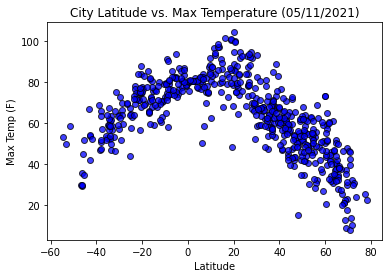

In [18]:
fig, ax = plt.subplots(figsize=(6,4))
x_axis = df_lng_lat.lat
y_axis = df_lng_lat['max_temp']
ax.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
ax.set_xlabel('Latitude');
ax.set_ylabel('Max Temp (F)');
ax.set_title("City Latitude vs. Max Temperature (05/11/2021)");

This plot is straightforward. It shows that near the equator, the max temperature is higher than further away from the equator. There is more land north of the equator. than south so the points are clustered toward higher latitudes. 

## Latitude vs. Humidity Plot

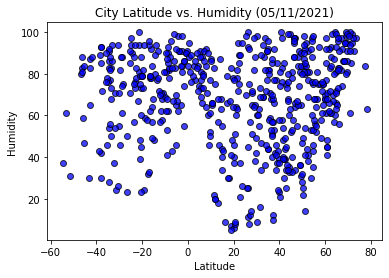

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
x_axis = df_lng_lat.lat
y_axis = df_lng_lat['humidity']
ax.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
ax.set_xlabel('Latitude');
ax.set_ylabel('Humidity');
ax.set_title("City Latitude vs. Humidity (05/11/2021)");

Places near the equator are more clustered as having high humidity. North and south of the equator, a larger cluster of cities have high humidity but the trends have a wider spread between high and low humidity. 

## Latitude vs. Cloudiness Plot

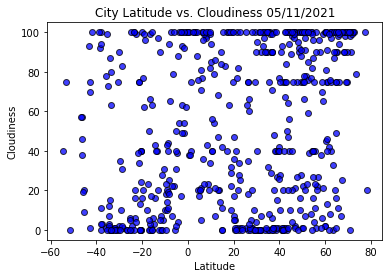

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
x_axis = df_lng_lat.lat
y_axis = df_lng_lat['cloudiness']
ax.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
ax.set_xlabel('Latitude');
ax.set_ylabel('Cloudiness');
ax.set_title("City Latitude vs. Cloudiness 05/11/2021");

Cloudiness does not seem to have any relationship to latitude. The fact that many cities cluster on cloudiness (on the y-axis) is likely more due to a lack of precision in the standardization of measurement that groups different levels of cloudiness in the same way.

## Latitude vs. Wind Speed Plot

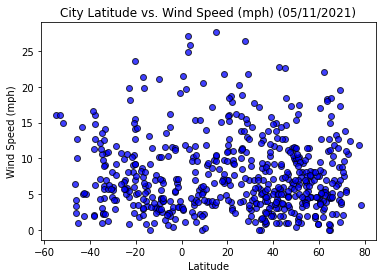

In [21]:
fig, ax = plt.subplots(figsize=(6,4))
x_axis = df_lng_lat.lat
y_axis = df_lng_lat['wind_speed']
ax.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
ax.set_xlabel('Latitude');
ax.set_ylabel('Wind Speed (mph)');
ax.set_title("City Latitude vs. Wind Speed (mph) (05/11/2021)");

Wind speed is generally low across the majority of cities surveyed. At the absolute lowest latitudes wind speed is higher but there are only a few points sampled so no definitive conclusions can be made. 

## Linear Regression

In [22]:
south_hemisphere = df_lng_lat[df_lng_lat['lat'] < 0]
len(south_hemisphere)
north_hemisphere = df_lng_lat[df_lng_lat['lat'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
#Set Variables for North and South Max temp vs Latitude
x_axis1 = north_hemisphere['lat']
y_axis1 = north_hemisphere['max_temp']
x_axis2 = south_hemisphere['lat']
y_axis2 = south_hemisphere['max_temp']

In [24]:
#Linear regression Northern Hemisphere
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression Southern
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

#testing rsquared
rvalue1 **2

0.6845064446948891

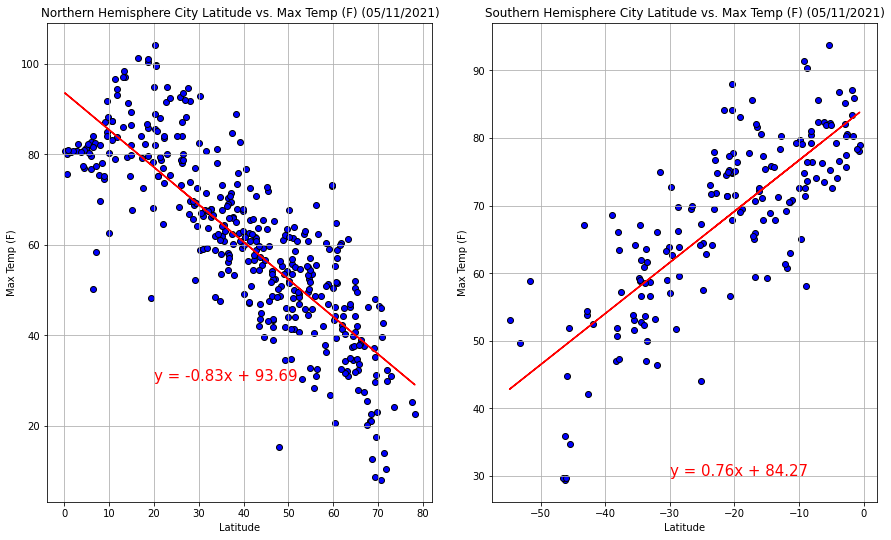

In [25]:
#Graph North and South Max temp versus latitude using multiple subplots
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('Latitude');
ax1.set_ylabel('Max Temp (F)');
ax1.set_title("Northern Hemisphere City Latitude vs. Max Temp (F) (05/11/2021)");
ax2.set_xlabel('Latitude');
ax2.set_ylabel('Max Temp (F)');
ax2.set_title("Southern Hemisphere City Latitude vs. Max Temp (F) (05/11/2021)");


#Grid
ax1.grid()
ax2.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(20,30),fontsize=15,color="red");
ax2.annotate(line_eq2, (-30,30), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");

Latitude is correlated to max temperature. The models are slightly better for the northern hemisphere than the southern but that could also be because there are more points in the northern hemisphere.

####  Northern and Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [26]:
#Set Variables for North and South humidity vs Latitude
x_axis1 = north_hemisphere['lat']
y_axis1 = north_hemisphere['humidity']
x_axis2 = south_hemisphere['lat']
y_axis2 = south_hemisphere['humidity']

In [27]:
#Linear regression Northern Hemisphere
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression Southern
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
rvalue2 **2

0.0381102975786297

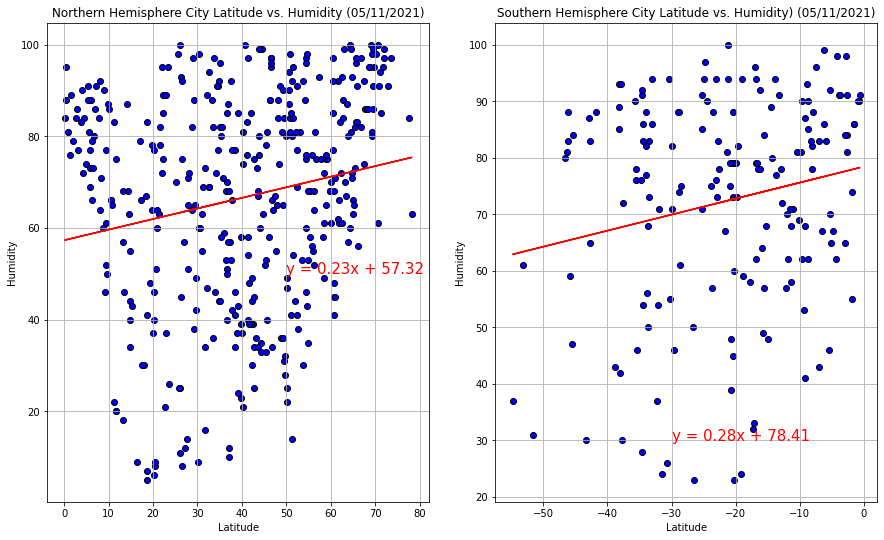

In [28]:
#Graph North and South humidity versus latitude using multiple subplots
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)
ax1.set_xlabel('Latitude');
ax1.set_ylabel('Humidity');
ax1.set_title("Northern Hemisphere City Latitude vs. Humidity (05/11/2021)");
ax2.set_xlabel('Latitude');
ax2.set_ylabel('Humidity');
ax2.set_title("Southern Hemisphere City Latitude vs. Humidity) (05/11/2021)");
ax1.grid()
ax2.grid()
ax1.annotate(line_eq1,(50,50),fontsize=15,color="red");
ax2.annotate(line_eq2, (-30,30), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");

Testing the Rsquared values for these charts, there is a low correlation between latitude and humidity. The rsquared values are not close to 1 and we can see that the spread of the data is not closely aligned with the lines of best fit.

####  Northern and Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [29]:
#Set Variables for North and South cloudiness vs Latitude
x_axis1 = north_hemisphere['lat']
y_axis1 = north_hemisphere['cloudiness']
x_axis2 = south_hemisphere['lat']
y_axis2 = south_hemisphere['cloudiness']

In [30]:
#Linear regression Northern Hemisphere
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression Southern
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))



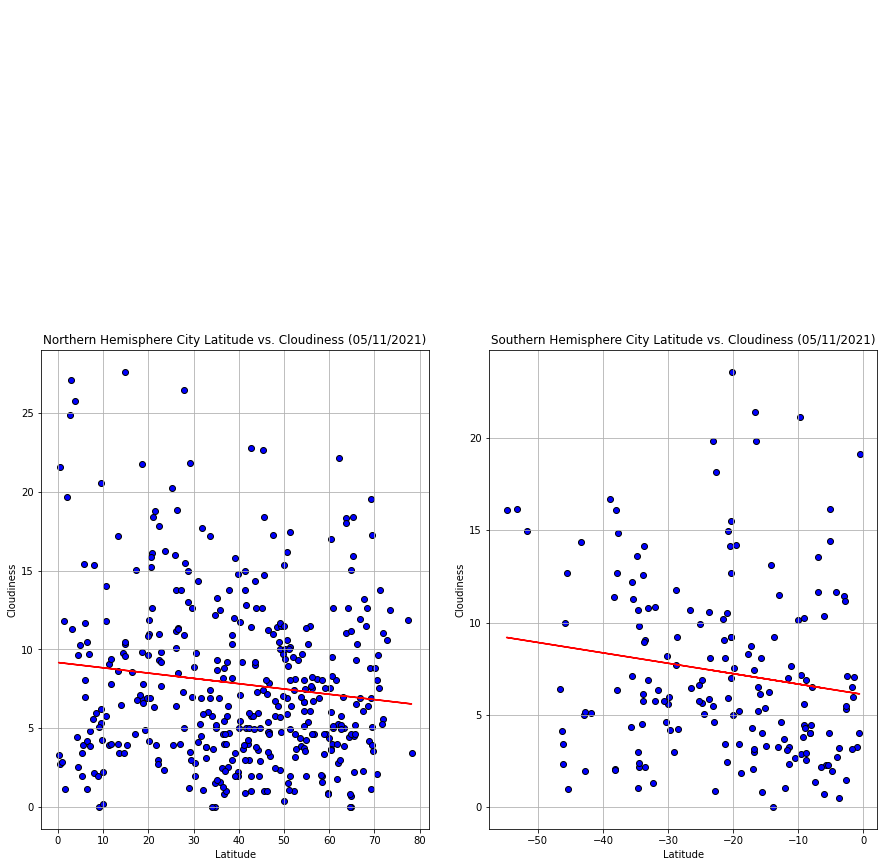

In [36]:
#Graph North and South Cloudiness versus latitude using multiple subplots
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)
ax1.set_xlabel('Latitude');
ax1.set_ylabel('Cloudiness');
ax1.set_title("Northern Hemisphere City Latitude vs. Cloudiness (05/11/2021)");
ax2.set_xlabel('Latitude');
ax2.set_ylabel('Cloudiness');
ax2.set_title("Southern Hemisphere City Latitude vs. Cloudiness (05/11/2021)");
ax1.grid()
ax2.grid()
ax1.annotate(line_eq1,(10,50),fontsize=15,color="red");
ax2.annotate(line_eq2, (-30,30), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");
#fig.savefig('Lat_vs_Cloud.png')

Again, cloudiness does not seem to be correlated with latitude. The data is scattered all over the plot. 

####  Northern and Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [32]:
#Set Variables for North and South wind speed vs Latitude
x_axis1 = north_hemisphere['lat']
y_axis1 = north_hemisphere['wind_speed']
x_axis2 = south_hemisphere['lat']
y_axis2 = south_hemisphere['wind_speed']

In [33]:
#Linear regression Northern Hemisphere
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression Southern
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
rvalue2 **2

0.023074197686145007

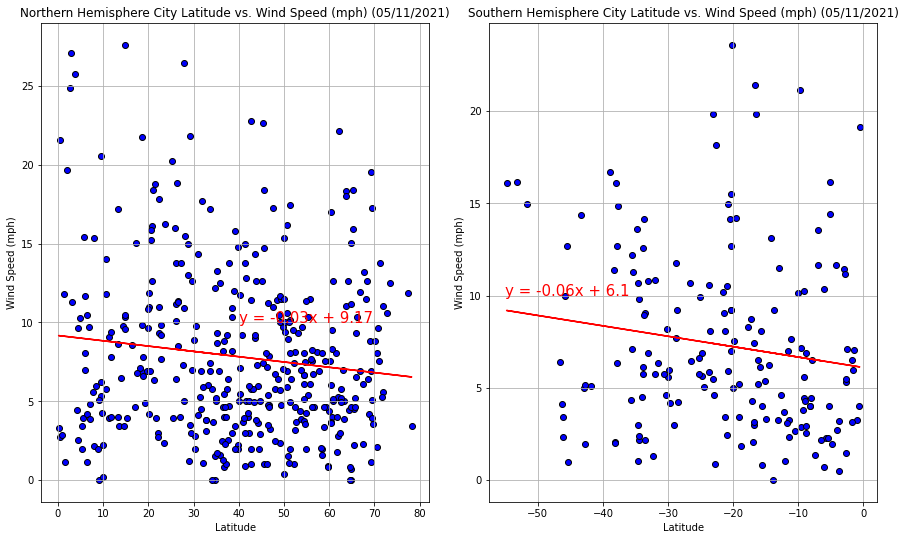

In [34]:
#Graph North and South wind speed versus latitude using multiple subplots
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)
ax1.set_xlabel('Latitude');
ax1.set_ylabel('Wind Speed (mph)');
ax1.set_title("Northern Hemisphere City Latitude vs. Wind Speed (mph) (05/11/2021)");
ax2.set_xlabel('Latitude');
ax2.set_ylabel('Wind Speed (mph)');
ax2.set_title("Southern Hemisphere City Latitude vs. Wind Speed (mph) (05/11/2021)");
ax1.grid()
ax2.grid()
ax1.annotate(line_eq1,(40,10),fontsize=15,color="red");
ax2.annotate(line_eq2, (-55,10), fontsize=15, color="red");

ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");

Finally wind speed and latitude. There isn't much of a correlation here either. The wind speed regression seems slightly better able to predict the data, but that seems to be coincidence rather than that the model is good. 